In [2]:
# Importing libraries as required:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Importing the data from the csv file provided:

loan=pd.read_csv('loan.csv', encoding="ISO-8859-1")

C:\Users\Vivek.Kakade\AppData\Local\Continuum\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Getting an idea of the length and breadth of the data
loan.shape

(39717, 111)

In [5]:
#counting the percentage of null or missing values across columns
round(100*(loan.isnull().sum())/(len(loan.index)),2)

id                                  0.00
member_id                           0.00
loan_amnt                           0.00
funded_amnt                         0.00
funded_amnt_inv                     0.00
term                                0.00
int_rate                            0.00
installment                         0.00
grade                               0.00
sub_grade                           0.00
emp_title                           6.19
emp_length                          2.71
home_ownership                      0.00
annual_inc                          0.00
verification_status                 0.00
issue_d                             0.00
loan_status                         0.00
pymnt_plan                          0.00
url                                 0.00
desc                               32.58
purpose                             0.00
title                               0.03
zip_code                            0.00
addr_state                          0.00
dti             

### Lets drop all the columns where more than 90% data is missing. 90% of 39717 is around 35746

In [6]:
loan=loan.dropna(axis=1, thresh=35746)

In [7]:
loan.shape

(39717, 53)

In [8]:
#  Again, counting the percentage of null or missing values across columns
round(100*(loan.isnull().sum())/(len(loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

### Lets drop all the rows with missing values as we don't have enough source to impute these missing values

In [9]:
loan=loan.dropna(axis=0)
print(loan.isnull().sum(axis=0))

id                            0
member_id                     0
loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
loan_status                   0
pymnt_plan                    0
url                           0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_ac

In [10]:
loan.shape

(36431, 53)

### Lets check the datatypes of the values to see if there is any discrepancies

In [11]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

### Standardizing the datatypes for "loan_amnt" and "funded amount"

In [12]:
loan['loan_amnt']=loan['loan_amnt'].astype('float64')
loan['funded_amnt']=loan['funded_amnt'].astype('float64')

In [13]:
loan.dtypes

id                              int64
member_id                       int64
loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                       object
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
loan_status                    object
pymnt_plan                     object
url                            object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                     int64
earliest_cr_line               object
inq_last_6mt

### Lets drop all the duplicate rows in the dataset, if any

In [14]:
loan=loan.drop_duplicates()

In [15]:
loan.shape

(36431, 53)

### Conducting variable analysis

### Variable analysis 1: loan_amnt, funded_amnt, funded_amnt_inv

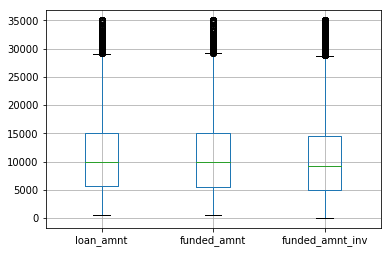

In [16]:
loan.boxplot(column=['loan_amnt','funded_amnt','funded_amnt_inv'])

#### Observation: It is observed that there is no anamoly in the these three variables

### Variable analysis 2: term

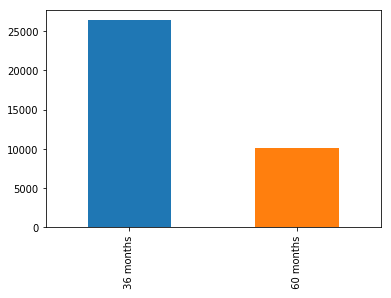

In [17]:
loan['term'].value_counts().plot('bar')

#### Observation: The company has issued more loans of 36 months as compared to 60 months

### Varible Analysis 3: grade

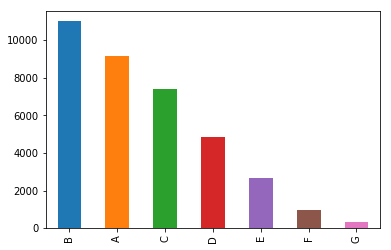

In [18]:
loan['grade'].value_counts().plot('bar')

In [19]:
loan['grade'].value_counts()

B    11035
A     9175
C     7430
D     4874
E     2650
F      969
G      298
Name: grade, dtype: int64

In [20]:
loan['grade'].count()

36431

In [21]:
round((11035+9175+7430)/36431,2)

0.76

#### Observation: 76% of the total loans is disbursed in A,B,C grade

### Variable Analysis 5: emp_length

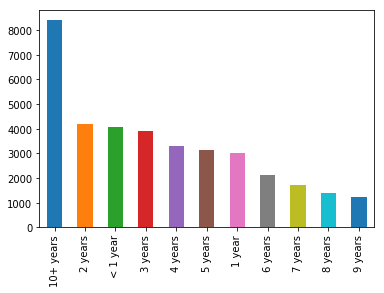

In [22]:
loan['emp_length'].value_counts().plot('bar')

#### Observation: Majority of the borrowers have experience of 10+ years

### Variable Analysis 9: loan_status

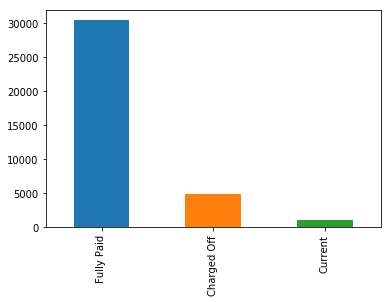

In [23]:
loan['loan_status'].value_counts().plot('bar')

#### Observation: Around 13% percent of the loan are default.

###  Varaible Analysis 10: int_rate

In [24]:
# Removing the % sign from the variable and converting it into float64
loan['int_rate']=loan['int_rate'].str[:-1].astype('float64')

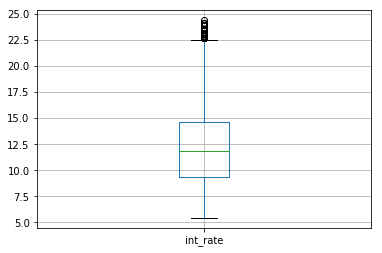

In [25]:
loan.boxplot(column=['int_rate'])

### Lets perform segmented univariate analysis to check the impact of a int_rate on loan_status

In [26]:
bins=[5,10,15,20,25]
loan['int_level'] = pd.cut(loan['int_rate'], bins=bins)

In [27]:
table=pd.DataFrame(loan.groupby(['int_level', 'loan_status'])['loan_status'].count())
table

loan_status
int_level loan_status             
(5, 10]   Charged Off          684
          Current               69
          Fully Paid         10417
(10, 15]  Charged Off         2355
          Current              492
          Fully Paid         14412
(15, 20]  Charged Off         1632
          Current              410
          Fully Paid          5137
(20, 25]  Charged Off          271
          Current               95
          Fully Paid           457

In [28]:
# Calculating percentage of each type of loan at each interest level
table1 = table.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
table1

loan_status
int_level loan_status             
(5, 10]   Charged Off     6.123545
          Current         0.617726
          Fully Paid     93.258729
(10, 15]  Charged Off    13.645055
          Current         2.850687
          Fully Paid     83.504259
(15, 20]  Charged Off    22.732971
          Current         5.711102
          Fully Paid     71.555927
(20, 25]  Charged Off    32.928311
          Current        11.543135
          Fully Paid     55.528554

#### Observations: 
#### 1. Almost 33% of the loans which are disbursed at the interest level of 20-25% get default. This means that riskier loans are                          getting default 
#### 2. 22% of the loans which are disbursed at the interest level of 15-20% get default, which is very alarming. 
#### 3. Highest number of loan default cases fall at the interest level of 10-15%, which is also very alarming

### Lets deep dive more into the int_level and grade of loan disbursed

In [29]:
table3=pd.DataFrame(loan.groupby(['int_level', 'grade'])['loan_status'].count())
table3

loan_status
int_level grade             
(5, 10]   A             9175
          B             1984
          C                3
          D                4
          E                4
(10, 15]  B             9051
          C             6857
          D             1328
          E               23
(15, 20]  C              570
          D             3542
          E             2533
          F              511
          G               23
(20, 25]  E               90
          F              458
          G              275

#### Observations:
#### 1. Low grade loans (C, D, E) which are also risky are also disbursed at low interest rate (10-15%). This could be one of the                       reasons for more defualt at these interest levels

### Variable analysis 11: dti

In [30]:
bins1=[0,5,10,15,20,25,30]
loan['obligation_to_income'] = pd.cut(loan['dti'], bins1)

In [31]:
table4=pd.DataFrame(loan.groupby(['obligation_to_income', 'loan_status'])['loan_status'].count())
table4

loan_status
obligation_to_income loan_status             
(0, 5]               Charged Off          496
                     Current               84
                     Fully Paid          3796
(5, 10]              Charged Off          848
                     Current              189
                     Fully Paid          6276
(10, 15]             Charged Off         1259
                     Current              251
                     Fully Paid          7641
(15, 20]             Charged Off         1235
                     Current              258
                     Fully Paid          6935
(20, 25]             Charged Off         1003
                     Current              230
                     Fully Paid          5161
(25, 30]             Charged Off           78
                     Current               49
                     Fully Paid           497

In [32]:
# Calculating percentage of each type of loan at each obligation to income ratio
table5 = table4.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
table5

loan_status
obligation_to_income loan_status             
(0, 5]               Charged Off    11.334552
                     Current         1.919561
                     Fully Paid     86.745887
(5, 10]              Charged Off    11.595788
                     Current         2.584439
                     Fully Paid     85.819773
(10, 15]             Charged Off    13.758059
                     Current         2.742870
                     Fully Paid     83.499071
(15, 20]             Charged Off    14.653536
                     Current         3.061224
                     Fully Paid     82.285240
(20, 25]             Charged Off    15.686581
                     Current         3.597122
                     Fully Paid     80.716297
(25, 30]             Charged Off    12.500000
                     Current         7.852564
                     Fully Paid     79.647436

In [33]:
import seaborn as sns

C:\Users\Vivek.Kakade\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


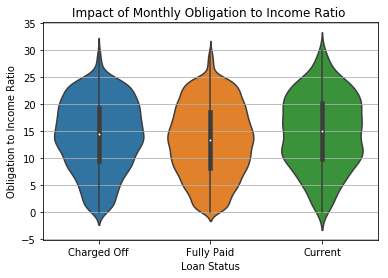

In [34]:
fig, axes = plt.subplots()
sns.violinplot('loan_status','dti', data=loan, ax = axes)
axes.set_title('Impact of Monthly Obligation to Income Ratio ')

axes.yaxis.grid(True)
axes.set_xlabel('Loan Status')
axes.set_ylabel('Obligation to Income Ratio')

plt.show()

#### Observation: The default rate is slightly higher where borrowers' obligation to monthly income ratio is higher i.e between 10 and 25. This coule possibly mean that such borrowers tend to default on loan due to low income level as compared to total obligations

### Variable Analysis 12: Revol_Util

In [35]:
# Removing the % sign from the values and converting it into float64
loan['revol_util']=loan['revol_util'].str[:-1].astype('float64')

In [36]:
bins2=[0,10,20,30,40,50,60,70,80,90,100]
loan['Utilization_level'] = pd.cut(loan['revol_util'], bins2)

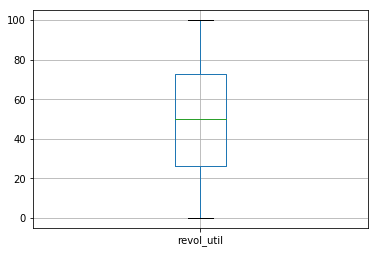

In [37]:
loan.boxplot(column=['revol_util'])

In [38]:
table6=pd.DataFrame(loan.groupby(['Utilization_level', 'loan_status'])['loan_status'].count())
table6

loan_status
Utilization_level loan_status             
(0, 10]           Charged Off          243
                  Current               56
                  Fully Paid          2823
(10, 20]          Charged Off          279
                  Current               58
                  Fully Paid          2722
(20, 30]          Charged Off          359
                  Current               93
                  Fully Paid          3040
(30, 40]          Charged Off          424
                  Current              116
                  Fully Paid          3233
(40, 50]          Charged Off          544
                  Current              111
                  Fully Paid          3345
(50, 60]          Charged Off          556
                  Current              129
                  Fully Paid          3322
(60, 70]          Charged Off          604
                  Current              148
                  Fully Paid          3247
(70, 80]          Charged Off          622
                  Current              126
                  Fully Paid          2996
(80, 90]          Charged Off          605
                  Current              121
                  Fully Paid          2740
(90, 100]         Charged Off          584
                  Current               88
                  Fully Paid          2245

In [39]:
# Calculating percentage of each type of loan at each obligation to income ratio
table7 = table6.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
table7

loan_status
Utilization_level loan_status             
(0, 10]           Charged Off     7.783472
                  Current         1.793722
                  Fully Paid     90.422806
(10, 20]          Charged Off     9.120628
                  Current         1.896044
                  Fully Paid     88.983328
(20, 30]          Charged Off    10.280641
                  Current         2.663230
                  Fully Paid     87.056128
(30, 40]          Charged Off    11.237742
                  Current         3.074477
                  Fully Paid     85.687782
(40, 50]          Charged Off    13.600000
                  Current         2.775000
                  Fully Paid     83.625000
(50, 60]          Charged Off    13.875717
                  Current         3.219366
                  Fully Paid     82.904916
(60, 70]          Charged Off    15.103776
                  Current         3.700925
                  Fully Paid     81.195299
(70, 80]          Charged Off    16.613248
                  Current         3.365385
                  Fully Paid     80.021368
(80, 90]          Charged Off    17.455280
                  Current         3.491056
                  Fully Paid     79.053664
(90, 100]         Charged Off    20.020569
                  Current         3.016798
                  Fully Paid     76.962633

In [40]:
table8=pd.DataFrame(loan.groupby(['loan_status'])['revol_util'].mean())
table8

,revol_util
loan_status,
Charged Off,56.161926
Current,53.829371
Fully Paid,47.997966


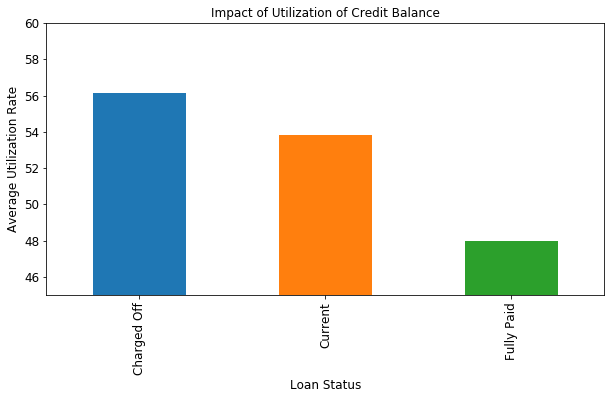

In [41]:
ax =table8['revol_util'].plot(kind='bar', title ="Impact of Utilization of Credit Balance", figsize=(10, 5), legend=False, fontsize=12)
ax.set_xlabel("Loan Status", fontsize=12)
ax.set_ylabel("Average Utilization Rate", fontsize=12)
plt.ylim((45,60))
plt.show()

#### Observation: It is clearly noticed that higher the utilization of credit balance by borrowers higher the default rate. This could mean that these borrowers are in need of money and have taken loan without enough sufficient income source to repay

In [42]:
export_csv = loan.to_csv (r'percent_df_null_Suman.csv', index = None, header=True)

### Variable Analysis 15: Derived Metric "Age of Customer i.e length of credit history"

In [43]:
loan['First_creditline']=loan['earliest_cr_line'].str[-2:].astype('float64')

In [44]:
loan['First_creditline'].head(10)

1     99.0
3     96.0
4     96.0
5      4.0
6      5.0
7      7.0
9      4.0
10    98.0
11    89.0
12     4.0
Name: First_creditline, dtype: float64

In [45]:
loan['Customer_Age'] = np.where(loan['First_creditline']<20, 16-loan['First_creditline'], 116-loan['First_creditline'])

In [46]:
loan['Customer_Age'].head(10)

1     17.0
3     20.0
4     20.0
5     12.0
6     11.0
7      9.0
9     12.0
10    18.0
11    27.0
12    12.0
Name: Customer_Age, dtype: float64

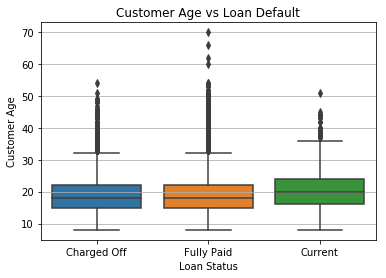

In [47]:
fig, axes = plt.subplots()
sns.boxplot('loan_status','Customer_Age', data=loan, ax = axes)
axes.set_title('Customer Age vs Loan Default')

axes.yaxis.grid(True)
axes.set_xlabel('Loan Status')
axes.set_ylabel('Customer Age')

plt.show()

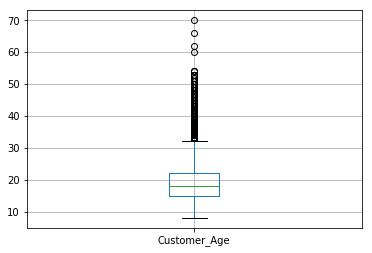

In [48]:
loan.boxplot(column=['Customer_Age'])

In [49]:
# Since there are outliers in the date, so dropping all the rows where credit history is more than 31 years
loan1=loan.loc[(loan['Customer_Age']<31)]

In [50]:
loan1.shape

(34112, 58)

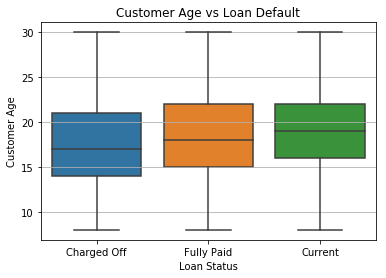

In [51]:
fig, axes = plt.subplots()
sns.boxplot('loan_status','Customer_Age', data=loan1, ax = axes)
axes.set_title('Customer Age vs Loan Default')

axes.yaxis.grid(True)
axes.set_xlabel('Loan Status')
axes.set_ylabel('Customer Age')

plt.show()

#### Observation: It is clearly noticeable that customer will less credit history duration default more on loan as compared to those having more credit history

### Analysis 17: Analysis to find and interprete correlations amonst numeric variables

In [52]:
#further cleaning the dataset by dropping some blank columns:
loan = loan.drop('tax_liens',axis=1)
loan = loan.drop('delinq_amnt',axis=1)
loan = loan.drop('collections_12_mths_ex_med',axis=1)
loan = loan.drop('policy_code',axis=1)
loan = loan.drop('acc_now_delinq',axis=1)
loan = loan.drop('chargeoff_within_12_mths',axis=1)
loan = loan.drop('out_prncp',axis=1)
loan = loan.drop('out_prncp_inv',axis=1)

In [53]:
overall_correl = loan.corr(method ='pearson')
print ("Overall Correl")
print (overall_correl)


Overall Correl
                               id  member_id  loan_amnt  funded_amnt  \
id                       1.000000   0.993308   0.144950     0.156884   
member_id                0.993308   1.000000   0.144808     0.156099   
loan_amnt                0.144950   0.144808   1.000000     0.981388   
funded_amnt              0.156884   0.156099   0.981388     1.000000   
funded_amnt_inv          0.220706   0.228297   0.953247     0.972773   
int_rate                 0.072246   0.067431   0.308209     0.312507   
installment              0.093199   0.088454   0.928915     0.954986   
annual_inc               0.011919   0.012958   0.261315     0.257179   
dti                      0.083203   0.084051   0.067403     0.067843   
delinq_2yrs             -0.004863  -0.004001  -0.035005    -0.035744   
inq_last_6mths          -0.038584  -0.043393   0.006823     0.007166   
open_acc                 0.024085   0.021571   0.173863     0.172338   
pub_rec                 -0.027367  -0.027492  -0.

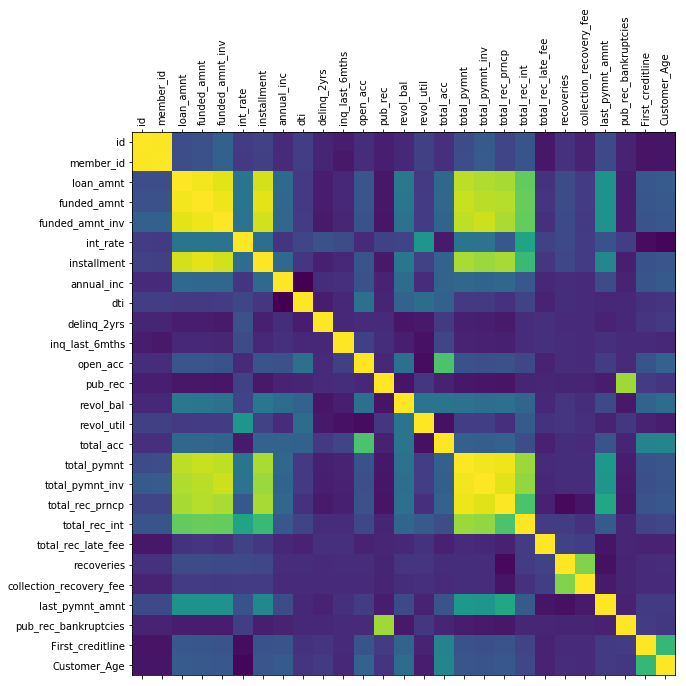

In [54]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90);
    plt.yticks(range(len(corr.columns)), corr.columns);

plot_corr (loan)

### Observation: Not many columns are correlated in the dataset. However, these variables are correlated:

1. loan_amnt, funded_amnt, funded_amnt_inv
2. total_pymnt, total_pymnt_inv, total_rec_prncp
3. installment with each of loan_amnt, funded_amnt, funded_amnt_inv
4. Group of (loan_amnt, funded_amnt, funded_amnt_inv) with group of (total_pymnt, total_pymnt_inv, total_rec_prncp)

### Analysis 18: Analyze impact of pupose on loan amount

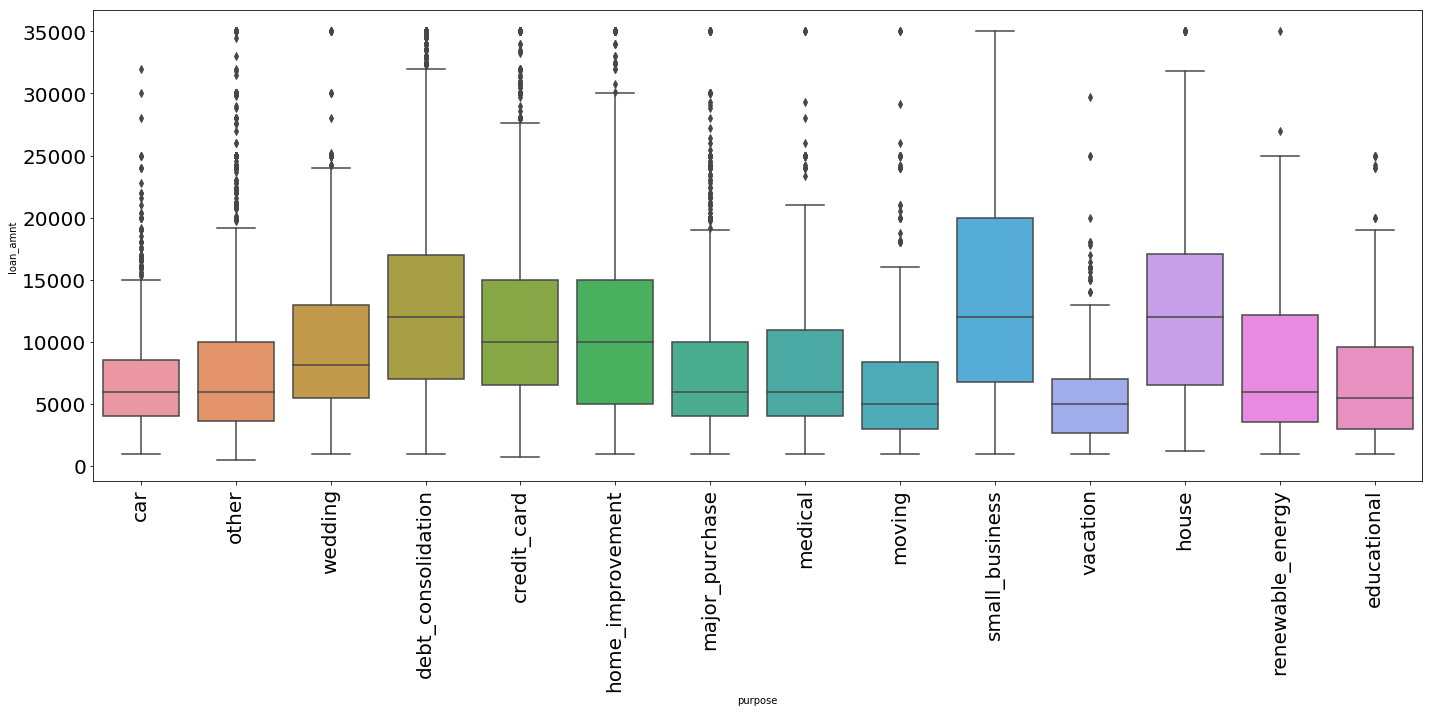

In [55]:
fig, axs = plt.subplots(1, 1, figsize=(20,10))

pur = sns.boxplot(x='purpose', y='loan_amnt', data=loan) # purpose
pur.set_xticklabels(pur.get_xticklabels(),rotation=90)

plt.tick_params(labelsize=20)

plt.tight_layout()    
plt.show() 

### Observation: Purpose does impact the loan amount. Purposes such as House, Small Business, Debt Consolidation, Home Improvement seem to attract higher loan amounts in the interquartile range than purposes such as Car, Vacation Moving etc.

In [56]:
loan['loan_status'].value_counts()

Fully Paid     30423
Charged Off     4942
Current         1066
Name: loan_status, dtype: int64

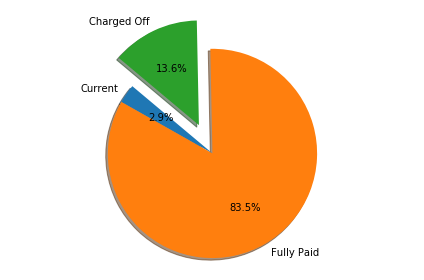

In [57]:
labels = ['Current', 'Fully Paid', 'Charged Off']
sizes = [1066, 30423, 4942]
explode = [0, 0, 0.3]
 
# Plot
plt.pie(sizes, explode=explode, labels=labels,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.tight_layout()
#plt.savefig('./figure1.png')
plt.show()

In [58]:
# We see that a small fraction of the loans disbursed are still being repaid. In order to turn this into a plain
# and more identifiable metric that represents whether a loan has been repaid or not, we shall drop the data
# representative of current loans.

loan = loan[~(loan['loan_status'] == 'Current')]

# We now assign a binary value to each row of data representative of whether the loan has been paid off fully or has been
# defaulted on: a 1 for paid, 0 for defaulted.


# The trick here is that since the loan status is a bunch of 1s and 0s, the mean would effectively give us the 
# probability of repayment of a loan. This is a simple and powerful derived metric to profile data against categories


# This will help us in bivariate analysis to see what factors influence successful payment and defaulting of loans
loan['loan_status_binary'] = loan['loan_status'].apply(lambda x : (1 if (x=='Fully Paid') else 0) )
loan['loan_status_binary'].value_counts()

1    30423
0     4942
Name: loan_status_binary, dtype: int64

In [59]:
# For bivariate analysis of purpose against loan status, we take a pivot table of them both and aggregate on the mean

table_purpose = pd.pivot_table(loan,values=['loan_status_binary'],index=['purpose'],aggfunc=np.mean).reset_index()
table_purpose

,purpose,loan_status_binary
0,car,0.893190
1,credit_card,0.896455
2,debt_consolidation,0.851677
3,educational,0.836957
4,home_improvement,0.886764
5,house,0.842424
6,major_purchase,0.903700
7,medical,0.847267
8,moving,0.848948
9,other,0.842288


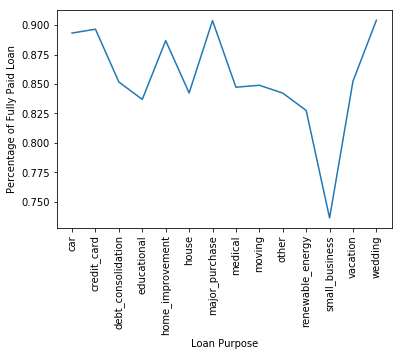

In [60]:
# Putting the above data on a graph, we get:

plt.plot(table_purpose['purpose'], table_purpose['loan_status_binary'])
plt.xlabel('Loan Purpose')
plt.ylabel('Percentage of Fully Paid Loan')
plt.xticks(rotation=90)
plt.show()

# We see that car loans, ones for major purchases and wedding loans are the ones which are most successfully paid off
# Educational, house, vacation and medical loans are the runner ups which see less success

# Loans for SMALL BUSINESSES have the highest probability of defaulting on the loan provided, probably due to high risk
# involved or low quality of collateral. So bank should take extra caution like take some asset or collateral
# while approving the loan for purpose of 'Small Businesses'.

In [61]:
# For bivariate analysis of loan term against loan status, we take a pivot tableof them both and aggregate on the mean

table_term = pd.pivot_table(loan,values=['loan_status_binary'],index=['term'],aggfunc=np.mean).reset_index()
table_term

,term,loan_status_binary
0,36 months,0.896531
1,60 months,0.753838


In [62]:
# Putting the above data on a graph, we get:

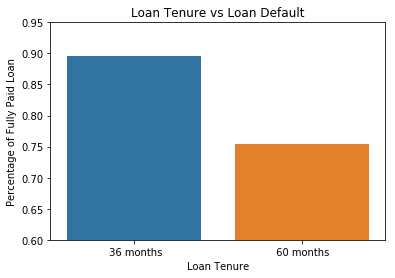

In [63]:
fig, axes = plt.subplots()
sns.barplot('term','loan_status_binary', data=table_term, ax = axes)
axes.set_title('Loan Tenure vs Loan Default')

axes.yaxis.grid(False)
axes.set_xlabel('Loan Tenure')
axes.set_ylabel('Percentage of Fully Paid Loan')
plt.ylim((0.6,0.95))

plt.show()

# We see that loans allowed to be paid over a longer term (60 months) attract a higher rate of default. It seems
# interesting to note that a significant number of loans benefit from having a short pay-off term.

In [64]:
# For bivariate analysis of installment against loan status, we take a pivot table of them both and aggregate on mean
# We calculate a new metric in the form of installment level to categorise the installment data into bins

bins_installment = [0,200,400,600,800,1000,1200,1400]
loan['installment_level'] = pd.cut(loan['installment'], bins_installment)
table_installment = pd.pivot_table(loan,values=['loan_status_binary'],index=['installment_level'],aggfunc=np.mean).reset_index()
table_installment

,installment_level,loan_status_binary
0,"(0, 200]",0.868719
1,"(200, 400]",0.865251
2,"(400, 600]",0.844593
3,"(600, 800]",0.844628
4,"(800, 1000]",0.826159
5,"(1000, 1200]",0.898089
6,"(1200, 1400]",0.882353


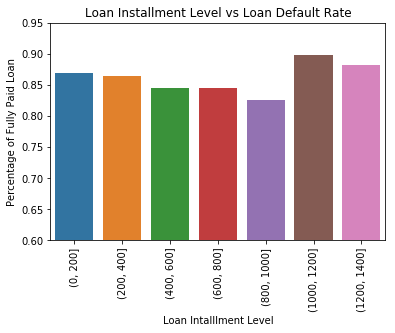

In [65]:
# Putting the above data on a graph, we get:

fig, axes = plt.subplots()
sns.barplot('installment_level','loan_status_binary', data=table_installment, ax = axes)
axes.set_title('Loan Installment Level vs Loan Default Rate')

axes.yaxis.grid(False)
axes.set_xlabel('Loan Intalllment Level')
axes.set_ylabel('Percentage of Fully Paid Loan')
plt.ylim((0.6,0.95))
plt.xticks(rotation=90)

plt.show()

# Although the data is spread almost evenly across loan installment levels, we see that loans with both very little or
# very high installment amounts tend to perform marginally better than the rest. Installment levels that are neither too
# low or too high suffer from a minor dip in repayment performance.

# Trivariate analysis would be helpful here with loan term considered as well.

In [66]:
# For bivariate analysis of home ownership against loan status, we take a pivot table of them both and calculate the mean

table_home = pd.pivot_table(loan,values=['loan_status_binary'],index=['home_ownership'],aggfunc=np.mean).reset_index()
table_home

,home_ownership,loan_status_binary
0,MORTGAGE,0.868734
1,OTHER,0.808511
2,OWN,0.861876
3,RENT,0.852505


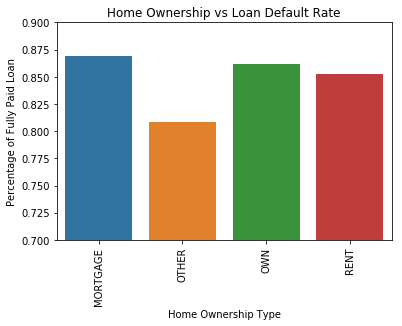

In [67]:
# Putting the above data on a graph, we get:

fig, axes = plt.subplots()
sns.barplot('home_ownership','loan_status_binary', data=table_home, ax = axes)
axes.set_title('Home Ownership vs Loan Default Rate')

axes.yaxis.grid(False)
axes.set_xlabel('Home Ownership Type')
axes.set_ylabel('Percentage of Fully Paid Loan')
plt.ylim((0.7,0.9))
plt.xticks(rotation=90)

plt.show()

# We see that unclassified categories of home ownership suffer have a significant dip in loan repayment performance and
# have a slightly higher chance of defaulting, whereas mortgaged homes show the highest success rate of repayment.

In [68]:
# For bivariate analysis of employment length against loan status, we take a pivot table of them both and check the mean

table_empL = pd.pivot_table(loan,values=['loan_status_binary'],index=['emp_length'],aggfunc=np.mean).reset_index()
table_empL

,emp_length,loan_status_binary
0,1 year,0.862116
1,10+ years,0.846413
2,2 years,0.870620
3,3 years,0.864075
4,4 years,0.866812
5,5 years,0.861321
6,6 years,0.860815
7,7 years,0.848596
8,8 years,0.859662
9,9 years,0.875000


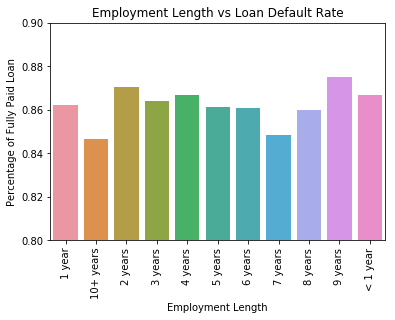

In [69]:
# Putting the above data on a graph, we get:

fig, axes = plt.subplots()
sns.barplot('emp_length','loan_status_binary', data=table_empL, ax = axes)
axes.set_title('Employment Length vs Loan Default Rate')

axes.yaxis.grid(False)
axes.set_xlabel('Employment Length')
axes.set_ylabel('Percentage of Fully Paid Loan')
plt.ylim((0.8,0.9))
plt.xticks(rotation=90)

plt.show()

# We see that loan repayment performance is almost the same across all levels of employment length.
# We also see minor dips in performance at 7 years and 10+ years.
# This could probably be explained as follows: If an individual starts working at the age of ~23, and reaches the 
# age of 30 in about 7 years, he/she might be investing in a significant purchase at that particular milestone which they
# can't necessarily afford. Otherwise this minor dip in performance remains unexplained.
# As for 10+ years, from the data given at an earlier stage, most investors come from this category and that's probably
# also where most of the loan repayment failure data lies. It might also explain that people with greater employment
# lengths invest more in loans and particularly bigger loans and hence have more loan repayment failures.

# Trivariate analysis would be helpful here with loan amount considered as well.

In [70]:
# For bivariate analysis of loan grade against loan status, we take a pivot table of them both and check the mean

table_grade = pd.pivot_table(loan,values=['loan_status_binary'],index=['grade'],aggfunc=np.mean).reset_index()
table_grade

,grade,loan_status_binary
0,A,0.943873
1,B,0.883094
2,C,0.837187
3,D,0.789790
4,E,0.738815
5,F,0.682927
6,G,0.670213


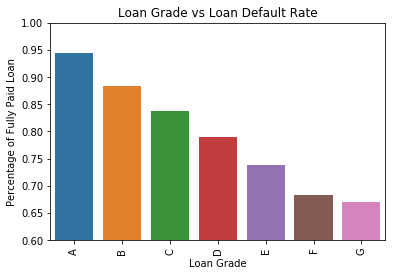

In [71]:
# Putting the above data on a graph, we get:

fig, axes = plt.subplots()
sns.barplot('grade','loan_status_binary', data=table_grade, ax = axes)
axes.set_title('Loan Grade vs Loan Default Rate')

axes.yaxis.grid(False)
axes.set_xlabel('Loan Grade')
axes.set_ylabel('Percentage of Fully Paid Loan')
plt.ylim((0.6,1))
plt.xticks(rotation=90)

plt.show()

# As expected, the poorer the quality of the loan disbursed, the more significant is the rate of defaulting on the same
# For better performance, the bank should stick to disbursing A (and probably B) grade loans.

In [72]:
#################################################fin#####################################################################